LOCO, AT version


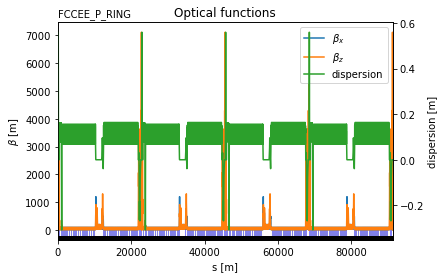

Execution time loading lattice: 13.630088329315186 sec


In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
#from at_modules_loco import *
from profiling_at_modules_loco import *
#ring=at.Lattice(ring1, energy=1)
t0_fullCode =  time.time()
t0 = time.time()

ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()
ring.plot_beta()

t1 = time.time()
print(f"Execution time loading lattice: {t1-t0} sec")

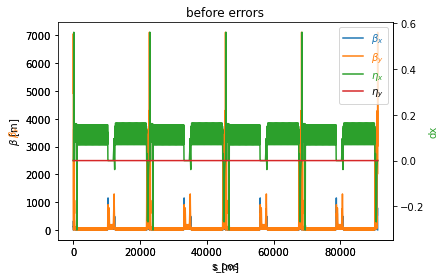

getOptics: 1.3214962482452393 sec


In [2]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [3]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(831, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  3324
Number of used Correctors:  4
Execution time choose correctors: 0.007582902908325195 sec


In [4]:
used_correctors

['CXY4', 'CXY5286', 'CXY10568', 'CXY15850']

In [5]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 28 #use all quads individually
used_quadrpoles_families, used_quadrpoles_families_ind = used_quadrpoles_fcc(ring, steps)


t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QDG1: 36 # of QFG2: 40 # of QD1: 720 # of QF2: 720 # of QD3: 700 # of QF4: 696
25
Execution time chose quadrpoles: 0.24175739288330078 sec


In [6]:
used_quadrpoles_families_ind

[array([3252, 3268, 3280, 3300, 3312, 3328, 3344, 3356, 3376, 3388, 3404,
        3420, 3432, 3452, 3464, 3480, 3496, 3508, 3528, 3540, 3556, 3572,
        3584, 3604, 3616, 3632, 3648, 3660], dtype=uint32),
 array([3680, 3692, 3708, 3724, 3736, 3756, 3768, 3784, 3800, 3812, 3832,
        3844, 3860, 3876, 3888, 3908, 3920, 3936, 3952, 3964, 3984, 3996,
        4012, 4028, 4040, 4060, 4072, 4088], dtype=uint32),
 array([4104, 4116, 4136, 4148, 4164, 4180, 4192, 4212, 4224, 4240, 4256,
        4268, 4288, 4300, 4316, 4332, 4344, 4364, 4376, 4392, 4408, 4420,
        4440, 4452, 4468, 4484, 4496, 4516], dtype=uint32),
 array([4528, 4544, 4560, 4572, 4592, 4604, 4620, 4636, 4648, 4668, 4680,
        4696, 4712, 4724, 4744, 4756, 4772, 4788, 4800, 4820, 4832, 4848,
        4864, 4876, 4896, 4908, 4924, 4940], dtype=uint32),
 array([4952, 4972, 4984, 5000, 5016, 5028, 5048, 5060, 5076, 5092, 5104,
        5124, 5136, 5152, 5168, 5180, 5200, 5212, 5228, 5244, 5256, 5276,
        5288, 5304, 

QF
IP0, IP1: 8 QFG2, 179 QF2, 173 QF4
IP2, IP3: 8 QFG2, 179 QF2, 173 QF4
IP4, IP5: 8 QFG2, 179 QF2, 173 QF4
IP6, IP7: 8 QFG2, 179 QF2, 173 QF4
QD
IP0, IP1: 8 QDG1, 179 QD1, 173 QD3
IP2, IP3: 8 QDG1, 179 QD1, 173 QD3
IP4, IP5: 8 QDG1, 179 QD1, 173 QD3
IP6, IP7: 8 QDG1, 179 QD1, 173 QD3

In [7]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-6, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 9.098711013793945 sec
orm dimensions:  (4, 3324)
0.0
0.0
1668.225515444474
45126.146525129116


In [8]:
dk =1.e-06

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, CfamilyNames= used_correctors)

t1 = time.time()
print(f"Execution time generatingQuadsResponse: {t1-t0} sec")

generating response to family  1
Execution time: 9.280970096588135 sec
generating response to family  2
Execution time: 9.140569686889648 sec
generating response to family  3
Execution time: 9.162605285644531 sec
generating response to family  4
Execution time: 9.2547926902771 sec
generating response to family  5
Execution time: 9.235347986221313 sec
generating response to family  6
Execution time: 9.154564380645752 sec
generating response to family  7
Execution time: 9.08471941947937 sec
generating response to family  8
Execution time: 9.2114417552948 sec
generating response to family  9
Execution time: 9.086915493011475 sec
generating response to family  10
Execution time: 9.186492681503296 sec
generating response to family  11
Execution time: 9.200440645217896 sec
generating response to family  12
Execution time: 9.025350332260132 sec
generating response to family  13
Execution time: 9.264277696609497 sec
generating response to family  14
Execution time: 9.909548282623291 sec
genera

Execution time simulte erros: 0.007974386215209961 sec


Text(0, 0.5, '$\\Delta K[m^-2]$')

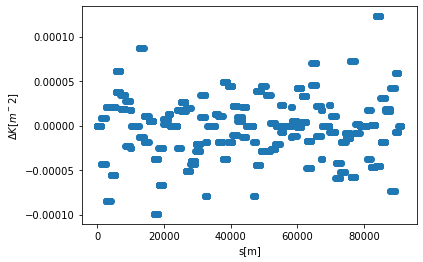

In [9]:
t0 = time.time()
gradErr = 2.e-3

simulateFixedGradientErrors(ring, gradErr, used_quadrpoles_families_ind)

t1 = time.time()
print(f"Execution time simulte erros: {t1-t0} sec")

#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
plt.scatter(twiss.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

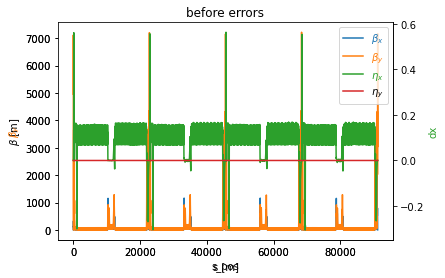

getOptics: 1.277440071105957 sec


In [10]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss_err, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [11]:
#Measured orm

Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

0.0
0.0
1668.225515444474
45126.146525129116


iteration0:
Execution time define matrices function: 0.8297481536865234 sec
Execution time get inverse: 0.003966808319091797 sec
Execution time set correction: 0.006979227066040039 sec
beta beating with errors


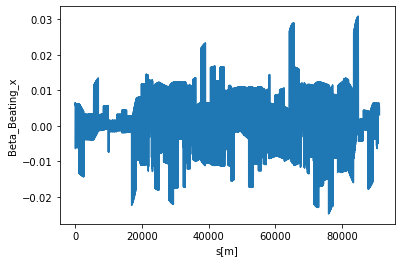

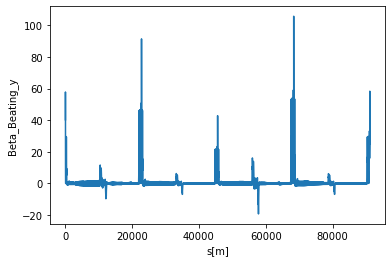

RMS beta beat, x:0.8637702840120038%   y: 742.8979411541416%
STD beta beat, x:0.863560727972634%   y: 733.1738109274067%
beta beating after corrections


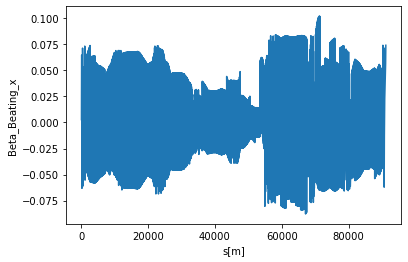

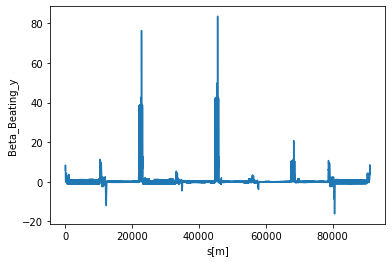

RMS beta beat, x:4.378584766160027%   y: 546.836077616166%
STD beta beat, x:4.369044462697515%   y: 541.5456361708159%
betax_correction reduction -406.91542036183057
betax_correction reduction 26.391493727036096
iteration1:
Execution time define matrices function: 0.8526906967163086 sec
Execution time get inverse: 0.003939390182495117 sec
Execution time set correction: 0.0069789886474609375 sec
beta beating with errors


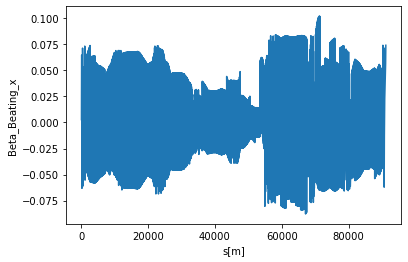

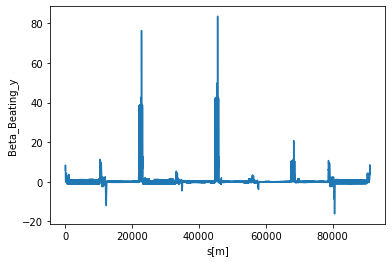

RMS beta beat, x:4.378584766160027%   y: 546.836077616166%
STD beta beat, x:4.369044462697515%   y: 541.5456361708159%
beta beating after corrections


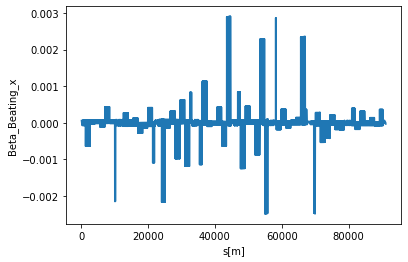

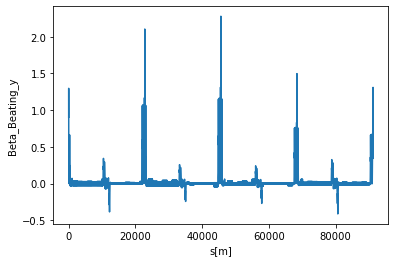

RMS beta beat, x:0.04211354035219354%   y: 17.459241430238063%
STD beta beat, x:0.04210875838041904%   y: 17.223408307330406%
betax_correction reduction 99.03819287278235
betax_correction reduction 96.80722575833904
iteration2:
Execution time define matrices function: 0.8387258052825928 sec
Execution time get inverse: 0.0029926300048828125 sec
Execution time set correction: 0.007976055145263672 sec
beta beating with errors


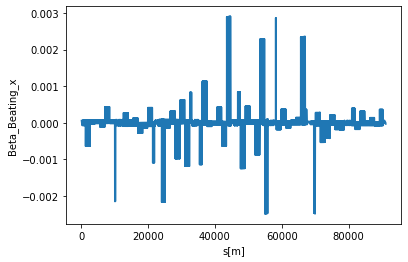

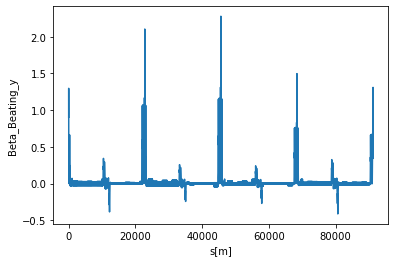

RMS beta beat, x:0.04211354035219354%   y: 17.459241430238063%
STD beta beat, x:0.04210875838041904%   y: 17.223408307330406%
beta beating after corrections


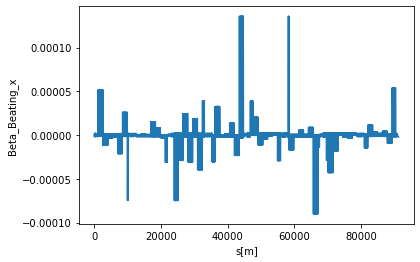

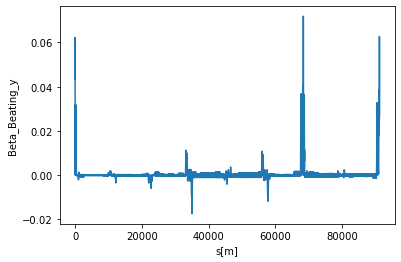

RMS beta beat, x:0.0014784298600780317%   y: 0.4561840441301528%
STD beta beat, x:0.0014782321694371027%   y: 0.4532261428231919%
betax_correction reduction 96.48941920409922
betax_correction reduction 97.38714854277644
iteration3:
Execution time define matrices function: 0.8350672721862793 sec
Execution time get inverse: 0.004987001419067383 sec
Execution time set correction: 0.010969877243041992 sec
beta beating with errors


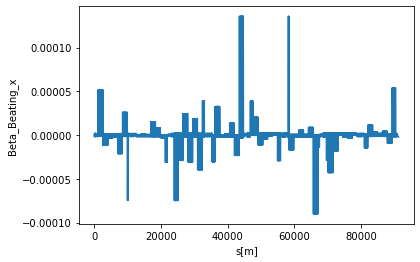

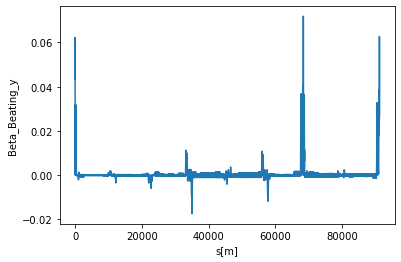

RMS beta beat, x:0.0014784298600780317%   y: 0.4561840441301528%
STD beta beat, x:0.0014782321694371027%   y: 0.4532261428231919%
beta beating after corrections


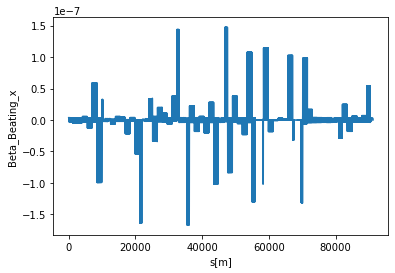

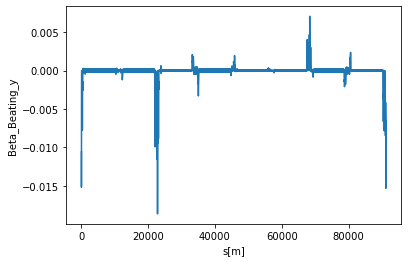

RMS beta beat, x:2.5933788219471054e-06%   y: 0.11904266347587719%
STD beta beat, x:2.593121655829693e-06%   y: 0.11861029261217178%
betax_correction reduction 99.82458560314723
betax_correction reduction 73.90468496046007
iteration4:
Execution time define matrices function: 0.8028221130371094 sec
Execution time get inverse: 0.003989458084106445 sec
Execution time set correction: 0.006980419158935547 sec
beta beating with errors


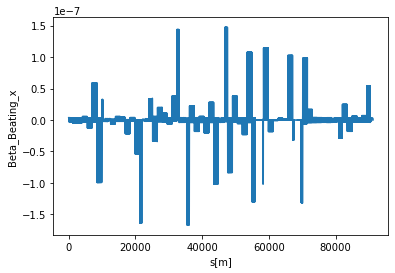

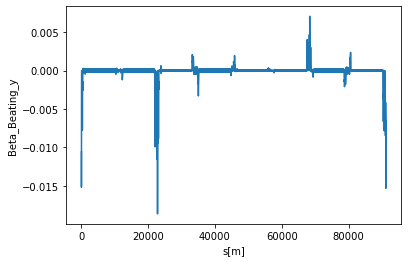

RMS beta beat, x:2.5933788219471054e-06%   y: 0.11904266347587719%
STD beta beat, x:2.593121655829693e-06%   y: 0.11861029261217178%
beta beating after corrections


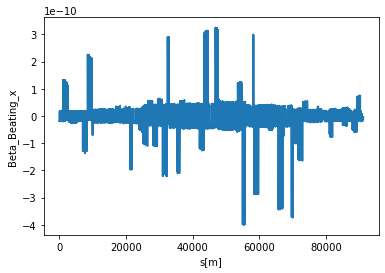

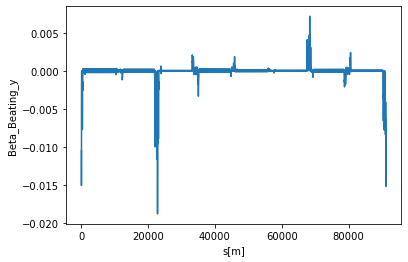

RMS beta beat, x:6.50823297503853e-09%   y: 0.11917909521280082%
STD beta beat, x:6.4996804660605654e-09%   y: 0.1187446715556596%
betax_correction reduction 99.74904426148771
betax_correction reduction -0.1146074297567079


In [12]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, at.elements.Monitor, BPMs_random_noise)

    Cxx1, Cxy1= ORM_x(1.e-6, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-6, ring, BPMs_random_noise, used_correctors)

    t0 = time.time()
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    t1 = time.time()
    print(f"Execution time define matrices function: {t1-t0} sec")
    Nk = len(dCx)
    cut = 104
    t0 = time.time()
    r= getInverse(A, B,Nk, cut)
    t1 = time.time()
    print(f"Execution time get inverse: {t1-t0} sec")
    #print("r................", r)
    t0 = time.time()
    setCorrection(ring, r , used_quadrpoles_families_ind)
    t1 = time.time()
    print(f"Execution time set correction: {t1-t0} sec")
    twiss_corr = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corr)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    #Cxx2, Cxy2= ORM_x(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)
    #Cyy2, Cyx2= ORM_y(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)

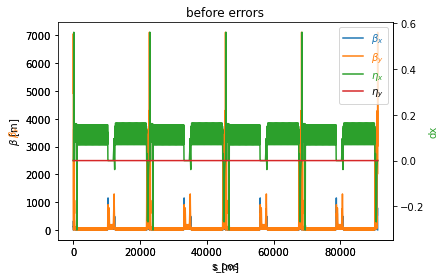

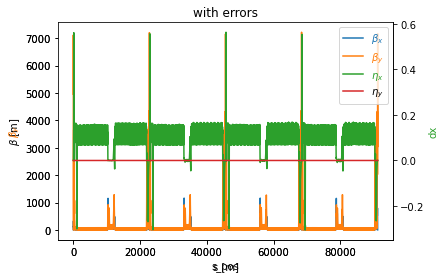

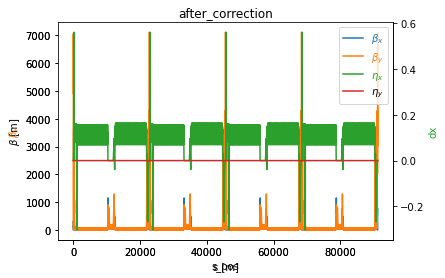

In [13]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corr, 'after_correction')

In [14]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 1028.5717878341675 sec
